## Observations and Insights 

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random 
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
combined_data.head()


Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [45]:
# Checking the number of mice.
umouse = combined_data ["Mouse ID"].nunique()
umouse
#totalm = combined_data ["Mouse ID"].count()
#totalm

249

In [33]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_df = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
dup_id = dup_df["Mouse ID"].unique()
dup_id

array(['g989'], dtype=object)

In [32]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_df_data = combined_data[combined_data["Mouse ID"].isin(dup_id)]
dup_df_data


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df = combined_data.drop_duplicates()
new_df


Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1892 rows x 8 columns]

In [35]:
# Checking the number of mice in the clean DataFrame.
new_umouse = new_df["Mouse ID"].nunique()
new_umouse


249

## Summary Statistics

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

index = new_df.set_index(["Drug Regimen"])
mean = new_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = new_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var = new_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std = new_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem = new_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]




st_summary = pd.DataFrame ({"Mean" : mean,
                           "Median" : median,
                           "Variation" : var,
                           "St Dev" : std,
                           "SEM":sem})
st_summary



Mean     Median  Variation    St Dev       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = new_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
agg_summary


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

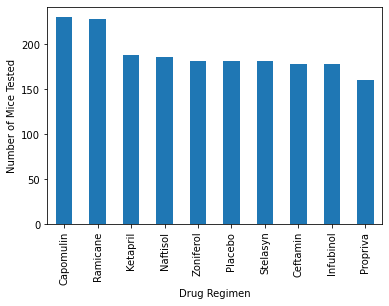

In [48]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
times = new_df.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending = False)

times.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()


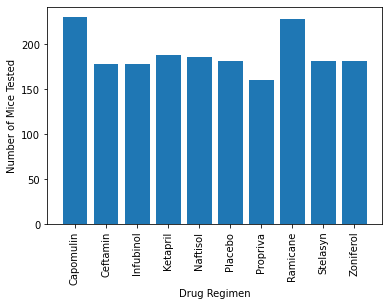

In [85]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_name = new_df["Drug Regimen"].sort_values().unique()
times = new_df.groupby("Drug Regimen")["Timepoint"].count()
x_axis = np.arange(len(drug_name))
x_ticks = [x for x in x_axis]

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.bar(x_axis, times, alpha=1)
plt.xticks(x_ticks, drug_name, rotation="vertical")

plt.show()



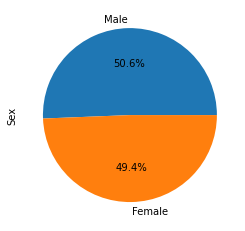

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = new_df["Sex"].value_counts()
sex.plot(kind="pie", autopct='%1.1f%%')
plt.show()



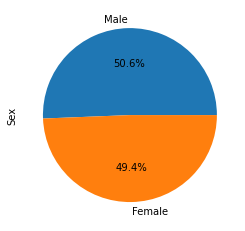

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = new_df["Sex"].unique()
plt.pie(sex, labels = labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = new_df.groupby("Mouse ID")["Timepoint"].max()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_df = pd.merge(max_time, new_df, how="left", on=["Mouse ID", "Timepoint"])
max_df.head()


Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a262         45      Placebo  Female          17          29   
3     a275         45     Ceftamin  Female          20          28   
4     a366         30     Stelasyn  Female          16          29   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           70.717621                 4  
3           62.999356                 3  
4           63.440686                 1

In [135]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:
    tumor = max_df.loc[max_df["Drug Regimen"] == drug]
     # add subset 
    tumor_list.append(tumor["Tumor Volume (mm3)"])
#print(tumor_vl)

for index, drug in enumerate(tumor_list):
    drug_name = drug_list[index]
    quartiles = drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"The lower quartile of {drug_name} is: {lowerq}")
    print(f"The upper quartile of {drug_name} is: {upperq}")
    print(f"The interquartile range of {drug_name} is: {iqr}")
    print(f"The the median of {drug_name} is: {quartiles[0.5]} ")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    outliers= (max_df.loc[(max_df["Drug Regimen"] == drug_name) & ((max_df["Tumor Volume (mm3)"]<lower_bound) |(max_df["Tumor Volume (mm3)"]>upper_bound))]) 
    nr_outliers = len(outliers)
    print(f"The number of outliers for {drug_name} is: {nr_outliers}")
                                   
    print('_____________________________________________________')

    

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The number of outliers for Capomulin is: 0
_____________________________________________________
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The number of outliers for Ramicane is: 0
_____________________________________________________
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.8329049

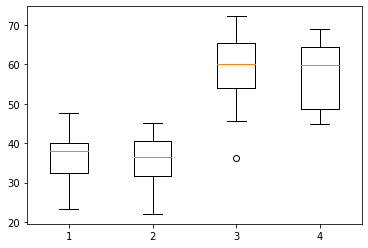

In [136]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
#ax1.set_xticklabels(drug_list)

ax1.boxplot(tumor_list)
plt.show()

## Line and Scatter Plots

j246


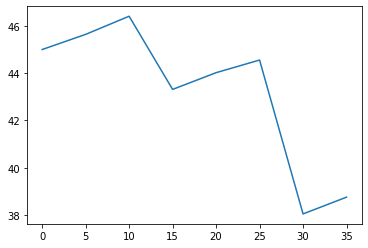

In [116]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
drug_df = new_df.loc[new_df["Drug Regimen"]=="Capomulin"],["Mouse ID","Timepoint", "Tumor Volume (mm3)"]

random_mouse = random.choice(new_df["Mouse ID"])
print(random_mouse)

random_mouse_df = new_df.loc[new_df["Mouse ID"] == random_mouse, ["Timepoint", "Tumor Volume (mm3)"]]

plt.plot(random_mouse_df["Timepoint"], random_mouse_df["Tumor Volume (mm3)"])



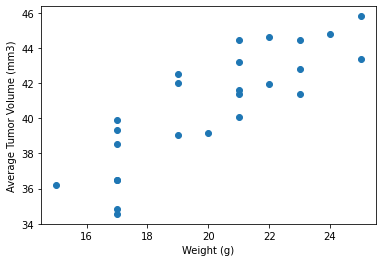

In [98]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_df = new_df.loc[new_df["Drug Regimen"]=="Capomulin",["Mouse ID","Timepoint", "Tumor Volume (mm3)", "Weight (g)"]]
capo_df
avg_tumor = capo_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_weight = capo_df.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(avg_weight, avg_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()



## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.71.


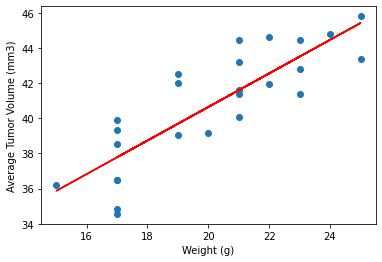

In [105]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, rvalue, pvalue, stderr = st.linregress(avg_weight, avg_tumor)
fit = slope * avg_weight + intercept

plt.scatter(avg_weight, avg_tumor)
plt.plot(avg_weight,fit,"r-")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

print(f"The correlation coefficient between mouse weight and average tumor volume is {round(rvalue**2,2)}.")
